In [1]:
import  cv2 as cv
import matplotlib.pyplot as plt

from clean import clean

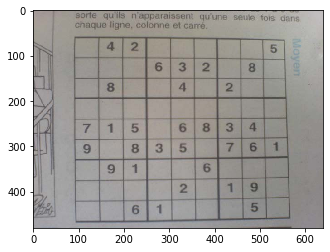

In [2]:
path = '../data/train/image10.jpg'
image = cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB)

plt.imshow(image)

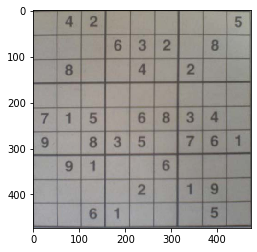

In [3]:
sudoku_images = clean(image)
sudoku_image = sudoku_images[0]

plt.imshow(sudoku_image)

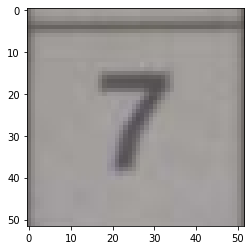

In [5]:
def get_cell(img, i, j):
    width = img.shape[0]//9
    return img[i*width:(i+1)*width, j*width:(j+1)*width]

plt.imshow(get_cell(sudoku_image, 4, 0))

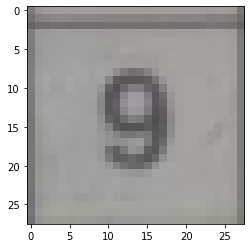

In [13]:
def get_cells(img):
    cells = []
    for i in range(9):
        cells.append([])
        for j in range(9):
            cell = get_cell(img, i, j)
            cell = cv.resize(cell, (28, 28))
            cells[-1].append(cell)
            
    return cells
 
cells = get_cells(sudoku_image)       
plt.imshow(cells[5][0])

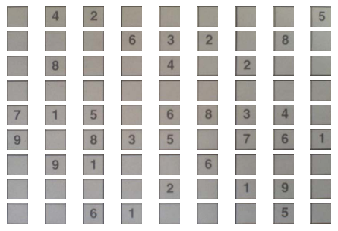

In [16]:
def plot_cells(cells):
    fig, axs = plt.subplots(9, 9)
    
    for r, row in enumerate(cells, 0):
        for c, cell in enumerate(row, 0):
            axs[r, c].imshow(cell)
            axs[r, c].axis('off')
            
plot_cells(cells)